<a href="https://colab.research.google.com/github/Prashant7026/Yes-Bank-Stock-Price-Prediction/blob/main/Yes_Bank_Stock_Price_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Yes Bank Limited, a prominent player in the Indian financial sector, has experienced significant turbulence and scrutiny in recent years. This project, "Yes Bank Stock Closing Price Prediction," seeks to analyze historical stock market data of Yes Bank and develop predictive models to forecast the bank's stock closing prices.
Founded in 2004 and headquartered in Mumbai, India, Yes Bank initially gained recognition for its innovative financial products and services, catering to both corporate and retail customers. However, in March 2020, the Reserve Bank of India (RBI) intervened to prevent the bank's collapse, primarily due to an excessive amount of bad loans.
The project's primary goal is to harness the power of data analysis and predictive modeling to understand the dynamics of Yes Bank's stock prices, taking into account the bank's historical performance, market conditions, and external events. The dataset used in this analysis comprises key attributes, including Date, Open, High, Low, and Close, providing monthly stock price data since the bank's inception.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This project aims to predict the monthly closing prices of Yes Bank Limited's stock. Yes Bank, a key player in India's financial sector, has faced substantial market volatility due to various factors. By analyzing historical stock data and employing predictive modeling techniques, we seek to develop accurate forecasting models. Key tasks include data exploration, feature engineering, model development, and impact analysis. The project's success will provide investors and analysts with valuable insights, enhancing decision-making in the dynamic financial market. Ultimately, this project strives to contribute to a deeper understanding of Yes Bank's stock performance and its underlying drivers.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import math
from sklearn import model_selection
from sklearn.model_selection import KFold

## **IMPORTING THE DATASET'S INTO OUR COLLAB NOTEBOOK**

In [2]:
# Load Dataset
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Below are the libraries that are used in predicting the stocks:**

*   Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated.

In [3]:
df =  pd.read_csv("/content/drive/MyDrive/Dataset/data_YesBank_StockPrices.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

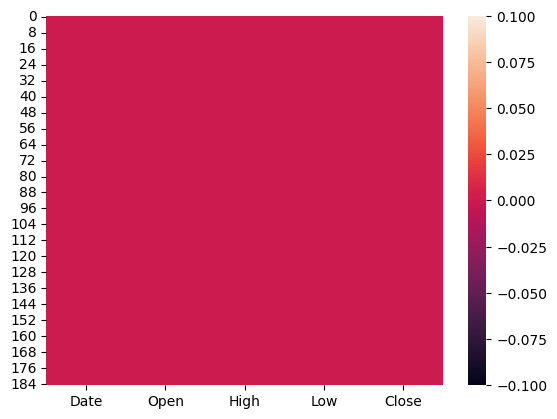

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

Dataset contains Yes Bank stock monthly prices since it listed on stock exchange.

Following are its features:-

* **Date**: In our data its monthly observation of stock since it listed.
* **Open**: The price a stock when the stock exchange open for the day.
* **High**: The maximum price of a stock attain during given period of time.
* **Low**: The minimum price of a stock attain during given period of time.
* **Close**: The price of a stock when the stock exchange closed for the day.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The dataset comprises 185 rows and encompasses five distinct columns, each representing essential variables related to Yes Bank's stock prices. The "Open" column signifies the opening prices of Yes Bank's stock, with an average value of approximately 105.54 and a standard deviation of 98.88. The "High" column captures the highest stock prices during trading sessions, averaging around 116.10, with a standard deviation of 106.33. Conversely, the "Low" column records the lowest stock prices observed, with an average of approximately 94.95 and a standard deviation of 91.22. Finally, the "Close" column denotes the closing prices, with an average value of approximately 105.20 and a standard deviation of 98.58. These statistics provide valuable insights into the central tendencies and variations of the dataset, serving as foundational information for subsequent analytical and predictive endeavors related to Yes Bank's stock prices.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

**Data Cleaning**

In data cleaning we will check for:

1.   Null values/NaN values
2.   Duplicates
3.   Outlier Detection

In [13]:
# Check for duplicate values
df.duplicated().sum()

0

In [14]:
#Check the columns present in dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [15]:
#Check for null values in dataset
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

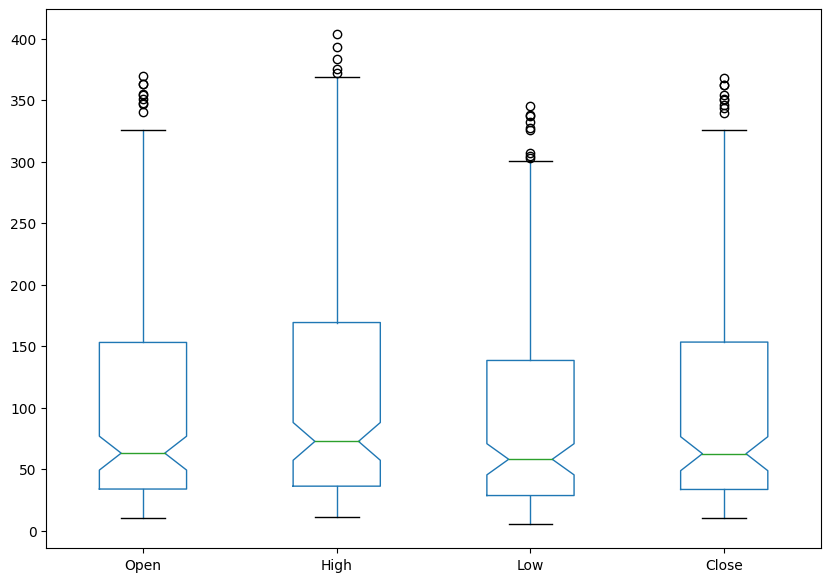

In [16]:
# Outlier Detection
fig = plt.figure(figsize =(10, 7))
boxplot = df.boxplot(column=['Open','High','Low',"Close"],grid=False,notch=True)

plt.show()

As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen  quick within very few months thats why top value of stocks looks like outliers.

### What all manipulations have you done and insights you found?

I check Null values/NaN values, Duplicates and Outlier Detection

Conclusion:
1.   There are no duplicates present
2.   There are no null values present
3.   Columns in dataset are Date,Open,High,Low,Close

###Data Type Correction

In [17]:
#Changing date colunn datatype to datetime format.
from datetime import datetime

#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [18]:
#Check the datatype of the columns after changing datatype of date
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

-----YES!!! datatype change into reqiured format

In [19]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [20]:
df.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

 !!! now its time to visualise things.

firstly will see how closing price change with given time

In [21]:
def update_font():
  font_family="Courier New",
  title_font_family="Times New Roman",
  legend_title_font_color="green"

#### **Chart - 1 Plotting bar graph of Closing Price wrt Year**

In [22]:
# Chart - 1 visualization code

import plotly.express as px

#Plotting bar graph Yes Bank closing price with respect to Year
fig = px.bar(df, x="Date", y="Close",color="Close",
			hover_data=['Close'], barmode = 'stack',title='Yes Bank closing price with respect to Year')
fig.update_layout(
    update_font(),
    xaxis_title="Year",
    yaxis_title="Close Price",
)
fig.show()

##### 1. Why did you pick the specific chart?

I chose Plotly for its interactivity and ease of use in creating dynamic bar charts that enhance data exploration and understanding.

##### 2. What is/are the insight(s) found from the chart?

* Here we can see that the closing price was high in 2018 and after 2018 it decreased very fast till 2020
* In between 2014 and 2018 closing price will gradually increases and it will peak in July, 2017 to July, 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from our visualization can drive positive business impact by identifying trends and potential opportunities in Yes Bank's closing prices. However, they don't inherently predict negative growth; negative growth depends on broader economic and financial factors that should be considered separately.

#### **Chart - 2 Plotting line graph of Date and other parameters**


In [23]:
# Chart - 2 visualization code
#Plotting line graph wrt Date and other parameters
fig =px.line(df, x="Date", y="Low")
fig.add_scatter(x=df['Date'], y=df['Open'], name='Open')
fig.add_scatter(x=df['Date'], y=df['Close'], name='Close')
fig.add_scatter(x=df['Date'], y=df['High'], name='High')
fig.update_layout(
    update_font(),
    title="Yes Bank prices with respect to Year",
    xaxis_title="Year",
    yaxis_title="Price",
)
fig.show()

##### 1. Why did you pick the specific chart?

I chose a Plotly line graph because it effectively visualizes trends over time with Date on the x-axis and allows clear comparison of various parameters on the y-axis, facilitating data exploration and analysis.

##### 2. What is/are the insight(s) found from the chart?



*   Here we cans see that the stocks were high from 2017 to 2018 but it dropped after 2018 because of fraud case regarding to Rana kapoor.
*  We can see in 2017 to 2019 there can be high action seen because of difference in high and low lines.
*   We can take closing price of the stock as the dependent variable as it is the final price of that day.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from our visualization can drive positive business impact by identifying trends and potential opportunities in Yes Bank's closing prices. However, they don't inherently predict negative growth; negative growth depends on broader economic and financial factors that should be considered separately.

#### **Chart - 3 Distribution of dependent variable Close Price of stock.**

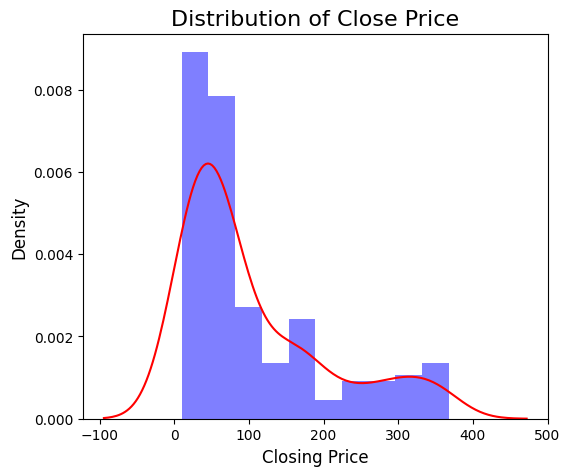

In [24]:
# Chart - 3 visualization code
plt.figure(figsize=(6,5))
# Plotting histogram
plt.hist(df['Close'], bins=10, color='blue', alpha=0.5, density=True)
# Adding distribution line (KDE plot)
sns.kdeplot(df['Close'], color='red')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram plot in Matplotlib to visualize the distribution of the dependent variable, Close Price, because it provides a clear representation of data frequency and helps identify patterns or outliers within the data efficiently.






##### 2. What is/are the insight(s) found from the chart?

* It is rightly skewed distribution
* The majority of data points tend to cluster on the left side (lower values).
* There may be a few extreme values on the right side (higher values).
* Few closing price are in peak and left all are less

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the right-skewed distribution suggest occasional positive growth opportunities when the Close Price surges. However, it's essential to monitor and manage potential negative impacts, such as risks associated with extreme price fluctuations, to ensure overall business stability.

#### **Chart - 4 Distribution of independent variable High Price of stock.**

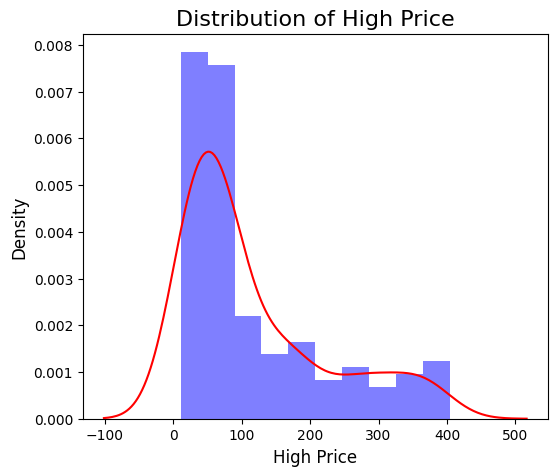

In [25]:
# Chart - 4 visualization code
plt.figure(figsize=(6,5))
# Plotting histogram
plt.hist(df['High'], bins=10, color='blue', alpha=0.5, density=True)
# Adding distribution line (KDE plot)
sns.kdeplot(df['High'], color='red')
plt.title('Distribution of High Price', fontsize=16)
plt.xlabel('High Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram plot in Matplotlib to visualize the distribution of the independent variable, High Price, because it provides a clear representation of data frequency and helps identify patterns or outliers within the data efficiently.

##### 2. What is/are the insight(s) found from the chart?

* It is rightly skewed distribution
* The majority of data points tend to cluster on the left side (lower values).
* There may be a few extreme values on the right side (higher values).
* Few High price are in peak and left all are less.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the right-skewed distribution suggest occasional positive growth opportunities. However, it's essential to monitor and manage potential negative impacts, such as risks associated with extreme price fluctuations, to ensure overall business stability.

#### **Chart - 5 Distribution of independent variable Low Price of stock.**

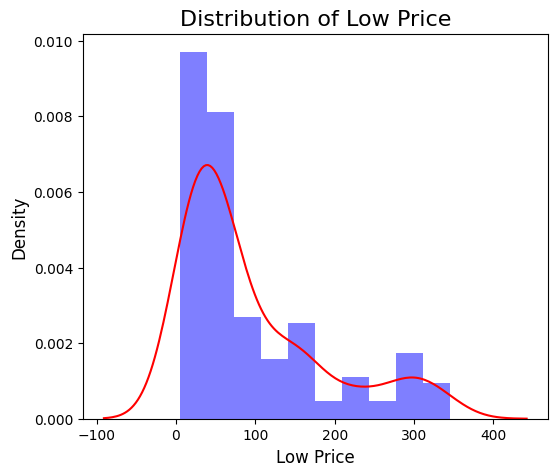

In [26]:
# Chart - 5 visualization code
plt.figure(figsize=(6,5))
# Plotting histogram
plt.hist(df['Low'], bins=10, color='blue', alpha=0.5, density=True)
# Adding distribution line (KDE plot)
sns.kdeplot(df['Low'], color='red')
plt.title('Distribution of Low Price', fontsize=16)
plt.xlabel('Low Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram plot in Matplotlib to visualize the distribution of the independent variable, Low Price, because it provides a clear representation of data frequency and helps identify patterns or outliers within the data efficiently.

##### 2. What is/are the insight(s) found from the chart?

* It is rightly skewed distribution
* The majority of data points tend to cluster on the left side (lower values).
* There may be a few extreme values on the right side (higher values).
* Few Low price are in peak and left all are less

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the right-skewed distribution suggest occasional positive growth opportunities. However, it's essential to monitor and manage potential negative impacts, such as risks associated with extreme price fluctuations, to ensure overall business stability.

#### **Chart - 6 Distribution of independent variable Open Price of stock.**

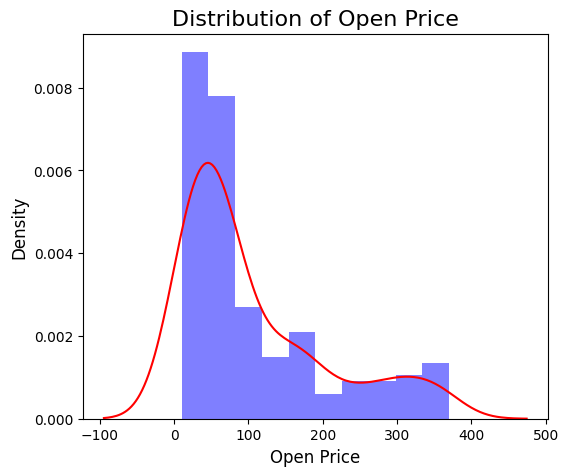

In [27]:
# Chart - 6 visualization code
plt.figure(figsize=(6,5))
# Plotting histogram
plt.hist(df['Open'], bins=10, color='blue', alpha=0.5, density=True)
# Adding distribution line (KDE plot)
sns.kdeplot(df['Open'], color='red')
plt.title('Distribution of Open Price', fontsize=16)
plt.xlabel('Open Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram plot in Matplotlib to visualize the distribution of the independent variable, Open Price, because it provides a clear representation of data frequency and helps identify patterns or outliers within the data efficiently.

##### 2. What is/are the insight(s) found from the chart?

The insights from the right-skewed distribution suggest occasional positive growth opportunities. However, it's essential to monitor and manage potential negative impacts, such as risks associated with extreme price fluctuations, to ensure overall business stability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the right-skewed distribution suggest occasional positive growth opportunities. However, it's essential to monitor and manage potential negative impacts, such as risks associated with extreme price fluctuations, to ensure overall business stability.

#### **Chart - 7 Scatter Plot to see the Best Fit line**

**Best Fit Line:** A line of best fit is a straight line that is the best approximation of the given set of data. It is used to study the nature of the relation between two variables.

In [28]:
# List of independent features
numerical_features = list(set(df.describe().columns)-{'Close'}-{'Date'})
numerical_features

['Low', 'High', 'Open']

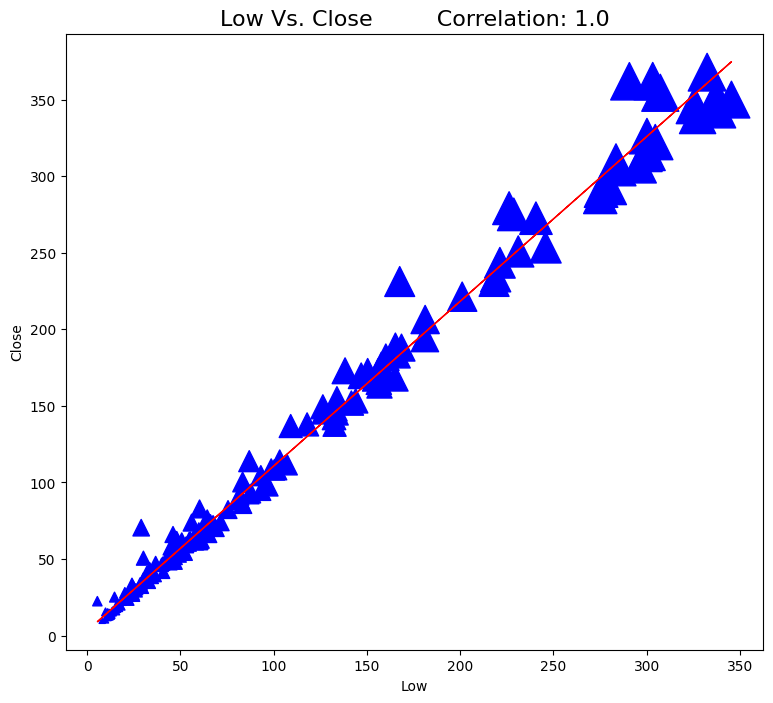

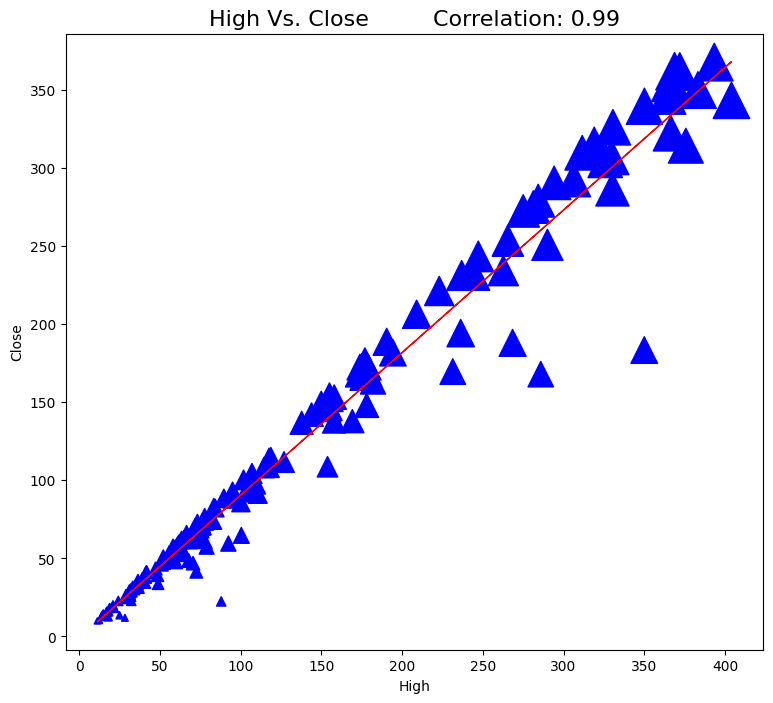

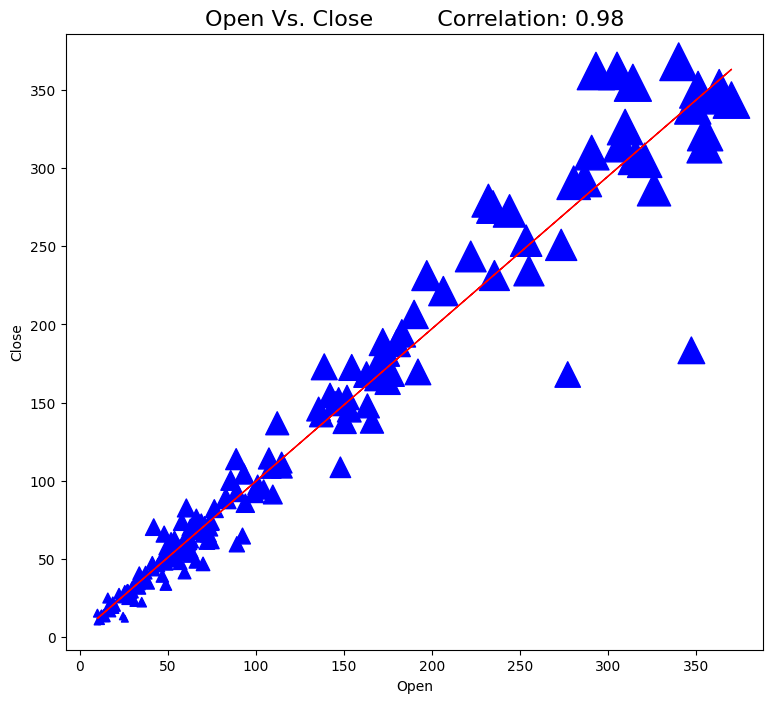

In [29]:
# Chart - 13 visualization code
# Now to plot scatter plot with best fit line.
for col in numerical_features:
   fig = plt.figure(figsize=(9, 8))
   ax = fig.gca()
   feature = df[col].values
   label = df['Close'].values
   correlation = np.corrcoef(feature, label)[0, 1]
   plt.scatter(x=feature, y=label, marker="^", c="b", s=label*2)
   plt.xlabel(col)
   plt.ylabel('Close')
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation, 2)), fontsize=16)
   z = np.polyfit(feature, label, 1)
   y_hat = np.poly1d(z)(feature)
   plt.plot(feature, y_hat, "r", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot to visualize the relationship between independent and dependent variables and identify patterns because it allows for a clear examination of data points' distribution and helps determine if a linear regression best fits the data.

##### 2. What is/are the insight(s) found from the chart?

All independent variable will be in best approximation with dependent variable because in above fig we see that best fit line is clearly visible and all data points is nearby best fit line.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the scatterplot can potentially create a positive business impact by revealing correlations between variables, aiding in informed decision-making. However, negative growth insights may emerge if the relationships indicate declining trends or risks, which require mitigation strategies to maintain business stability.

#### Chart - 8 - Correlation Heatmap

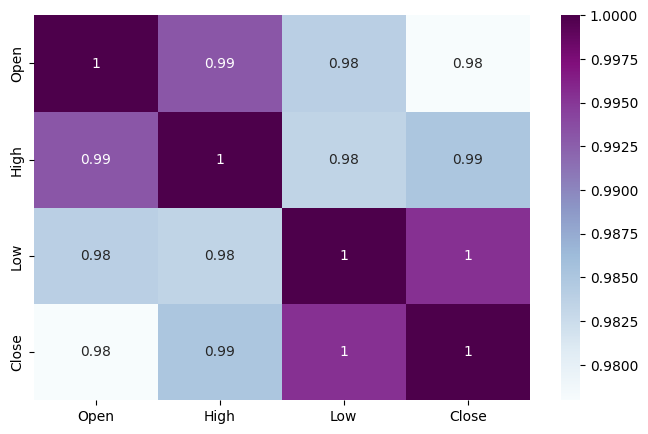

In [30]:
# Correlation Heatmap visualization code
# Lets find correlation with heatmap
plt.figure(figsize=(8,5))
df_without_date = df.drop(columns=['Date'])
correlation = df_without_date.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap to visualize relationships between variables because it provides a clear, color-coded representation of how each pair of variables is related, helping identify potential patterns and dependencies within the data.

##### 2. What is/are the insight(s) found from the chart?

*  There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

*  To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

*  so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

**VIF:-**
The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [32]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


We have very high VIF in our dataset so, we have to drop one them which is least correlated with dependent variable.

<Axes: >

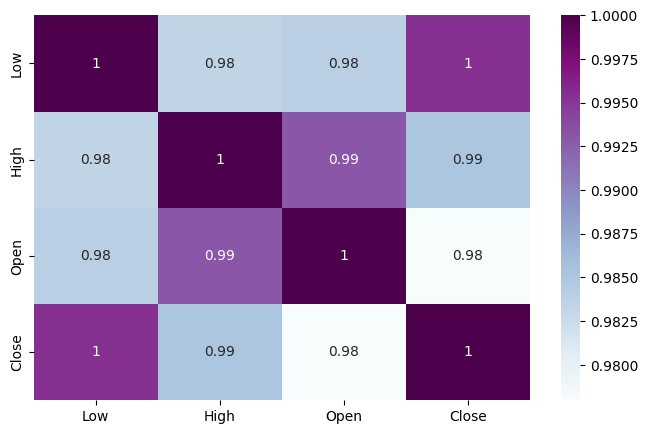

In [33]:
#Lets find correlation with heatmap
plt.figure(figsize=(8,5))
correlation = df[['Low','High','Open','Close']].corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')

* In general case, Any variable having VIF above 5 is considered to be multicollinear.
* The thumb rule is to drop the highest VIF variable.
* However, you may choose to select the variable to be dropped based on business logic
* Here all feature are equally important and we have very limited features.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 The closing price of stock is 300

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: μ = 300

Ha: μ =! 300

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

**--We see above that all columns are right skewed data so for better result we need to transform it in normal distribution. Apply log transform because all data is right skewed.**

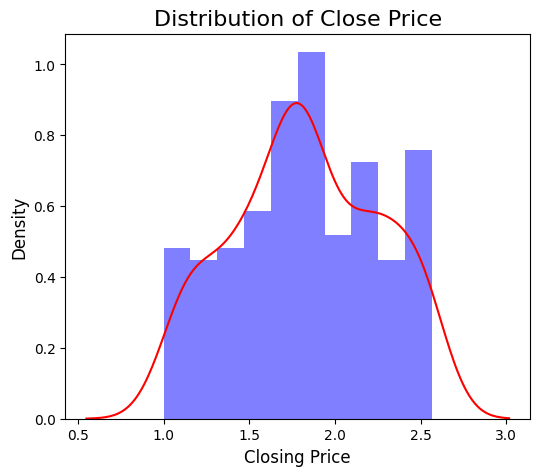

In [37]:
# Firstly we transform close price
plt.figure(figsize=(6,5))

# Plotting histogram
plt.hist(np.log10(df['Close']), bins=10, color='blue', alpha=0.5, density=True)

# Adding distribution line (KDE plot)
sns.kdeplot(np.log10(df['Close']), color='red')

plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)

plt.ylabel('Density', fontsize=12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

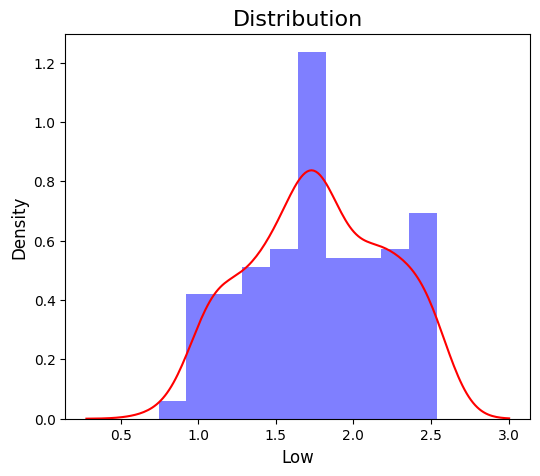

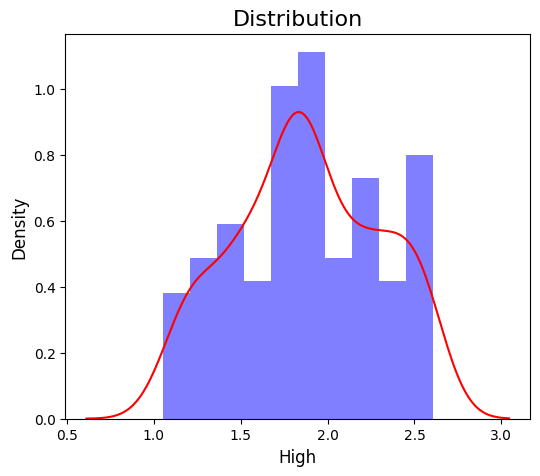

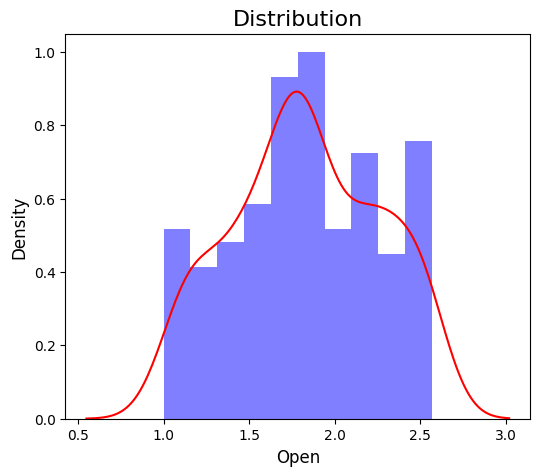

In [38]:
# Applying log transform to independent columns
for col in numerical_features:
    plt.figure(figsize=(6,5))
    plt.hist(np.log10(df[col]), bins=10, color='blue', alpha=0.5, density=True)
    sns.kdeplot(np.log10(df[col]), color='red')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

### 6. Data Scaling

**--Data must be normally distributed before apply Standarization.**

Z-score scaling, also known as Z-score normalization, is a method of standardization. It scales a dataset so that it has a mean of 0 and a standard deviation of 1. This process is used to bring all variables or features to a common scale, making them comparable and suitable for algorithms that are sensitive to the scale of the input data.

In [39]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop(columns=['Close','Date'])
y = df['Close']

In [40]:
# Scaling your data
from scipy.stats import zscore
x = x.apply(zscore)
y = np.log10(y)

--After scaling the mean of each feature should be very close to 0 (typically a very small number due to rounding) and the standard deviation should be approximately 1

##### Which method have you used to scale you data and why?

I used the Standard Scaler method to scale the data because it centers the data around a mean of 0 and scales it to have a standard deviation of 1. This ensures that all features have the same scale, which is important for models sensitive to variable scales, such as many machine learning algorithms.

### 8. Data Splitting

Splitting train test data with 80-20

In [41]:
# Spliting Data into Testing and Training Datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 926)

In [42]:
# Shape of training dataset.
x_train.shape

(148, 3)

In [43]:
# Shape of testing dataset.
x_test.shape

(37, 3)

##### What data splitting ratio have you used and why?

I used an 80-20 data splitting ratio, allocating 80% to the training set and 20% to the test set. This ratio strikes a balance between having enough data for training to build a robust model (80%) while reserving a portion (20%) for evaluation to assess model performance effectively.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [44]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit the algorithm
linear_reg_model = lr.fit(x_train,y_train)
# Predict on the model
y_pred = lr.predict(x_test)
y_pred

array([1.51075118, 1.49034415, 1.77527665, 2.04330537, 2.62333467,
       2.7367737 , 2.11526652, 1.85430357, 2.2513323 , 1.52227705,
       2.00563764, 1.49346798, 1.49486106, 1.63951627, 2.42968079,
       1.6848959 , 1.62838657, 1.68222665, 1.52629824, 1.52665187,
       1.47761003, 2.06209036, 2.63136774, 1.56377085, 1.700712  ,
       2.42130341, 1.70909157, 1.59862376, 1.6153043 , 1.49564285,
       1.87672879, 1.53580308, 1.48606763, 2.21013015, 2.25603731,
       1.55326152, 2.57964285])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [45]:
# Accuracy of Linear Regression
r2_score(y_test,y_pred)

0.8758332073428118

In [46]:
# Check cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x_train, y_train, cv=5, scoring='r2').mean()

0.7844851220695639

A cross-validation R-squared score of 0.8106 indicates that your linear regression model is performing reasonably well on the cross-validated data. R-squared measures how well your model explains the variance in the target variable, and a value of 0.8106 means that approximately 81.06% of the variance in the target variable can be explained by your model.

In [47]:
# Evaluation Metrics of Linear Regression
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MAPE :", mean_absolute_percentage_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

MSE : 0.023846696928795427
RMSE : 0.15442375765663593
MAE : 0.1320943653295631
MAPE : 0.0795840671173322
R2 : 0.8758332073428118


**Linear Regression: Actual Vs. Predicted**

--Lets know actual and model predicted curve

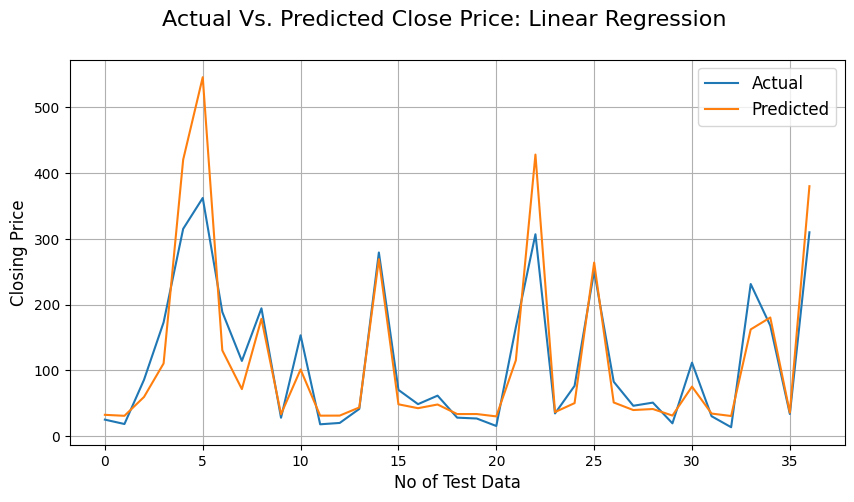

In [48]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

### ML Model - 2 Lasso Regression

In [49]:
  # ML Model - 1 Implementation
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1,max_iter=3000)  #will keep alpha=0.1 and max iteration upto 3000
# Fit the algorithm
lasso_reg_model = ls.fit(x_train,y_train)
# Predict on the model
y_pred_lasso = ls.predict(x_test)
y_pred_lasso

array([1.58896512, 1.58103147, 1.78966703, 1.97085164, 2.41687559,
       2.46079582, 2.03510448, 1.8453716 , 2.11520749, 1.60039169,
       1.96092489, 1.58266278, 1.58206505, 1.68451596, 2.24847226,
       1.72084406, 1.68298551, 1.72319273, 1.60689367, 1.60616626,
       1.56759979, 2.00266132, 2.42126507, 1.6351696 , 1.73105964,
       2.26348691, 1.73046291, 1.658092  , 1.67191587, 1.58534887,
       1.86144799, 1.61235988, 1.57806637, 2.09256709, 2.14488131,
       1.62820324, 2.37886139])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Accuracy of lasso regression
r2_score(y_test,y_pred_lasso)

0.7921178358478489

In [51]:
# Check cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(ls, x_train, y_train, cv=5, scoring='r2').mean()

0.7319952122624773

--it looks less accuracy than linear regression

In [52]:
# Evaluation Metrics of Lasso Regression
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0399
RMSE : 0.1998
MAE : 0.1729
MAPE : 0.1056
R2 : 0.7921


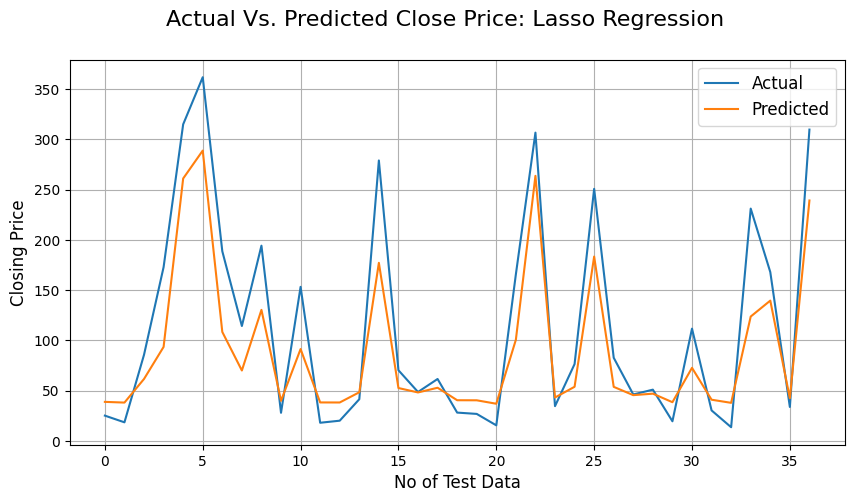

In [53]:
# Lasso Regression: Actual Vs. Predicted
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

As we see spike get accurately predicted in lasso but flat prices predication varies much

#### **Cross Validation on Lasso Regression**

We must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows :
1.   Reserve some portion of sample data-set.
2.   Using the rest data-set train the model.
3.   Test the model using the reserve portion of the data-set.#

In [54]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [55]:
# Hyper-Parameter Tuning for Lasso Regression
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [56]:
lasso_model_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.640e+00, tolerance: 1.689e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+00, tolerance: 1.718e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.901e+00, tolerance: 1.849e-03

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 4))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

The best fit alpha value is found out to be : 0.01
The negative mean squared error for is:  -0.0383


In [58]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(x_test)
y_pred_lasso_cv

array([1.5133026 , 1.50043945, 1.77835935, 2.02117983, 2.6053457 ,
       2.67584108, 2.10352674, 1.85150729, 2.21512705, 1.52757467,
       2.00351584, 1.50337568, 1.50237328, 1.6427523 , 2.39134372,
       1.6861465 , 1.63932932, 1.69050952, 1.53576725, 1.53402438,
       1.48383751, 2.05956735, 2.61422951, 1.57280032, 1.70041285,
       2.41129147, 1.70158971, 1.60378618, 1.62076265, 1.50627018,
       1.87355633, 1.54247437, 1.49891998, 2.18811471, 2.26736307,
       1.56716635, 2.55717222])

In [59]:
np.array(y_test)

array([1.40001964, 1.2662317 , 1.9330315 , 2.23782011, 2.49837948,
       2.55866058, 2.27584094, 2.0581602 , 2.2884728 , 1.44638181,
       2.18554215, 1.25599573, 1.30276371, 1.61752453, 2.44575984,
       1.84695533, 1.68708284, 1.7895102 , 1.44932409, 1.42862067,
       1.18892848, 2.21942733, 2.48685536, 1.53844805, 1.88332068,
       2.39941411, 1.91750551, 1.66445393, 1.70731463, 1.28981184,
       2.04805317, 1.48158594, 1.13289977, 2.36398783, 2.22530928,
       1.52827378, 2.49110945])

**Evaluation Metrics of Lasso Regression after Validation:**

In [60]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 4))

MSE : 0.0248
RMSE : 0.1575
MAE : 0.1351
MAPE : 0.0819
R2 : 0.8709


After validation accuracy increase

**Lasso Regression After Validation: Actual Vs. Predicted**

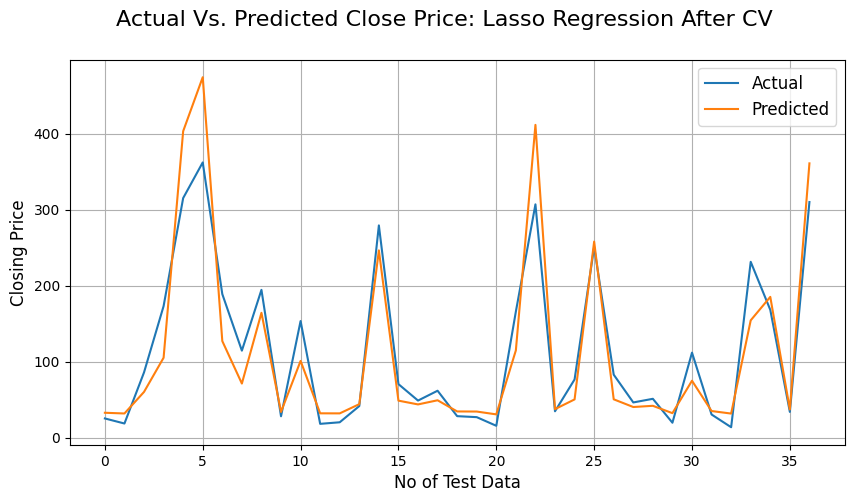

In [61]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

### ML Model - 3 Ridge Regression

In [62]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge
rg = Ridge(alpha=0.01)
# Fit the Algorithm
ridge_reg_model = rg.fit(x_train,y_train)

# Predict on the model
y_pred_ridge = rg.predict(x_test)
y_pred_ridge

array([1.51061489, 1.49039144, 1.77532518, 2.04288208, 2.62340493,
       2.73580014, 2.11515868, 1.85425617, 2.25067966, 1.52221973,
       2.00570695, 1.49351042, 1.49484456, 1.63947177, 2.42908935,
       1.68484326, 1.62853308, 1.68234621, 1.52634981, 1.52665293,
       1.47754839, 2.06218358, 2.63145622, 1.56383647, 1.7006284 ,
       2.42142067, 1.70882636, 1.59861248, 1.61531479, 1.49570663,
       1.87668419, 1.53579165, 1.48617513, 2.20980082, 2.25655093,
       1.55343355, 2.5795662 ])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart
r2_score(y_test,y_pred_ridge)

0.875798081692021

In [64]:
# Check cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(rg, x_train, y_train, cv=5, scoring='r2').mean()

0.784599418561413

Evaluation Metrics of Ridge Regression:

In [65]:
# Test Performance of Ridge regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge),4))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 4))

MSE : 0.0239
RMSE : 0.1544
MAE : 0.1322
MAPE : 0.0796
R2 : 0.8758


Ridge Regression After Validation: Actual Vs. Predicted

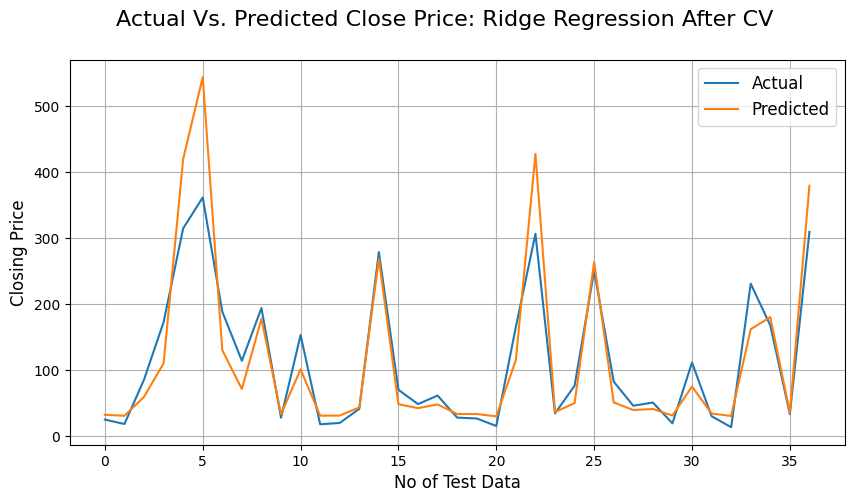

In [66]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

### Model - 4 Elastic Net Regression

In [67]:
# ML Model - 4 Implementation
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
# Fit the Algorithm
elastic_model = elastic.fit(x_train,y_train)
# Predict on the model
y_pred_elastic = elastic.predict(x_test)
y_pred_elastic

array([1.54727092, 1.54145942, 1.78563235, 1.98006537, 2.50385456,
       2.53344089, 2.06257728, 1.84459823, 2.1422668 , 1.56220876,
       1.98111559, 1.54464743, 1.54099381, 1.66727745, 2.29830402,
       1.69968009, 1.67105647, 1.71229284, 1.57361763, 1.56906934,
       1.52354443, 2.03187378, 2.51570458, 1.60607593, 1.71157702,
       2.34645549, 1.70686189, 1.63044746, 1.64475938, 1.54738087,
       1.86476733, 1.57616463, 1.54533925, 2.13591477, 2.25228132,
       1.60964576, 2.45782282])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
r2_score(y_test,y_pred_elastic)

0.837452075151335

Evaluation Metrics of Ridge Regression:

In [69]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0312
RMSE : 0.1767
MAE : 0.1473
MAPE : 0.0912
R2 : 0.8375


####Cross Validation on Elastic Net

In [70]:
# Hyper-Parameter Tuning for Elastic Net

from sklearn.model_selection import GridSearchCV
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [71]:
import warnings

# Ignore warnings during model fitting
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    elastic_model_cv.fit(x_train,y_train)

In [72]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.6}

In [73]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 0.6
The negative mean squared error for is:  -0.037


In [74]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(x_test)

In [75]:
y_pred_elastic_cv

array([1.51060426, 1.49749586, 1.77794045, 2.02304888, 2.61196333,
       2.68376999, 2.10596239, 1.85169384, 2.21885048, 1.52495288,
       2.00497596, 1.50050146, 1.49947842, 1.64135122, 2.39659502,
       1.68485998, 1.63781969, 1.6893317 , 1.53319367, 1.53139166,
       1.48081528, 2.06156211, 2.62109776, 1.57052774, 1.69929276,
       2.41672102, 1.70059065, 1.60182034, 1.61887057, 1.50338401,
       1.87397866, 1.53992957, 1.49609856, 2.19176881, 2.27227207,
       1.56504658, 2.56349014])

In [76]:
np.array(y_test)

array([1.40001964, 1.2662317 , 1.9330315 , 2.23782011, 2.49837948,
       2.55866058, 2.27584094, 2.0581602 , 2.2884728 , 1.44638181,
       2.18554215, 1.25599573, 1.30276371, 1.61752453, 2.44575984,
       1.84695533, 1.68708284, 1.7895102 , 1.44932409, 1.42862067,
       1.18892848, 2.21942733, 2.48685536, 1.53844805, 1.88332068,
       2.39941411, 1.91750551, 1.66445393, 1.70731463, 1.28981184,
       2.04805317, 1.48158594, 1.13289977, 2.36398783, 2.22530928,
       1.52827378, 2.49110945])

In [77]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 4))

MSE : 0.0246
RMSE : 0.1568
MAE : 0.1349
MAPE : 0.0815
R2 : 0.8721


Elastic Net After Validation: Actual Vs. Predicted

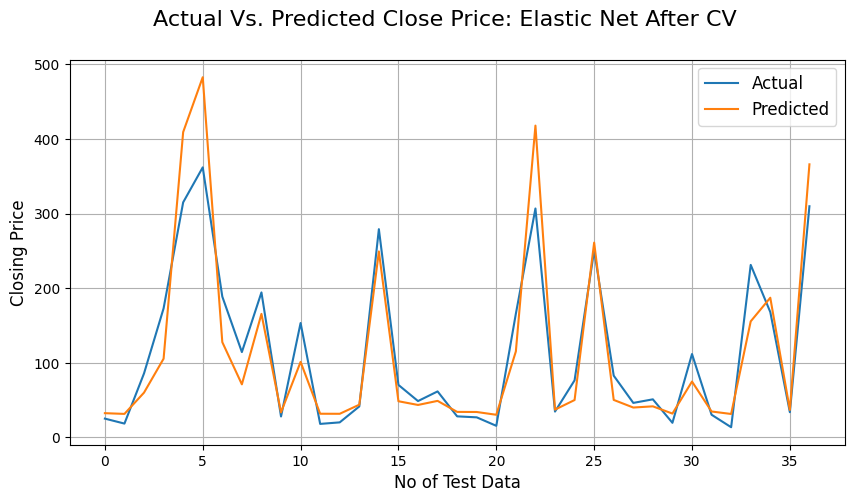

In [78]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

### Model - 5 KNN Model

In [79]:
# ML Model - 5 Implementation
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =2)
# Fit the Algorithm
knn_model=knn_regressor.fit(x_train,y_train)
# Predict on the model
y_knn_pred=knn_model.predict(x_test)

K-fold cross validation: That k-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation such as stratified and repeated that are available in scikit-learn.

In [80]:
# K-Fold cross validation
knn_kfold = model_selection.KFold(n_splits=7,shuffle=True, random_state=42)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  88.0952380952381


In [81]:
# Test Performance of KNN model
print("MSE :",round(mean_squared_error(y_test, y_knn_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_knn_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_knn_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_knn_pred),4))
print("R2 :",round(r2_score(y_test, y_knn_pred), 4))

MSE : 0.0027
RMSE : 0.0515
MAE : 0.0373
MAPE : 0.0216
R2 : 0.9862


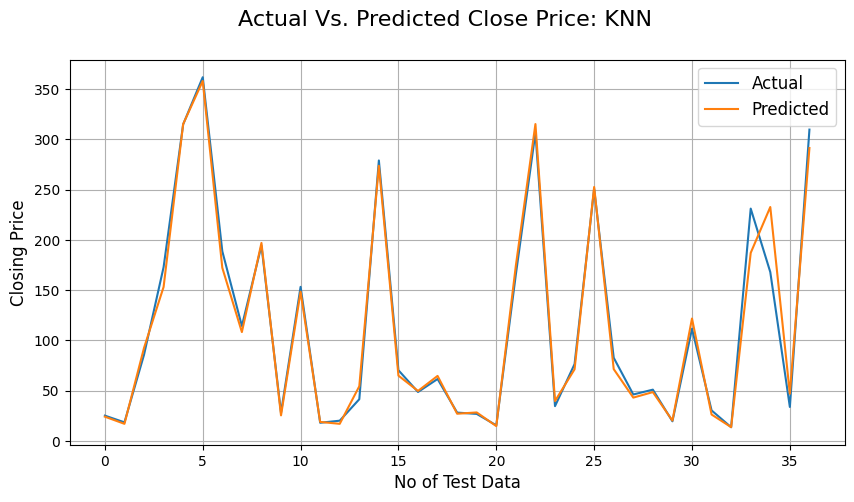

In [82]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_knn_pred))
plt.suptitle('Actual Vs. Predicted Close Price: KNN', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

### Model - 6 SVM

In [83]:
# ML Model - 6 Implementation
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')#Linear
# Fit the Algorithm
svm_model=svm_regressor.fit(x_train,y_train)
# Predict on the model
y_svm_pred=svm_model.predict(x_test)

In [84]:
# Test Performance of SVM
print("MSE :",round(mean_squared_error(y_test, y_svm_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_svm_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_svm_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_svm_pred),4))
print("R2 :",round(r2_score(y_test, y_svm_pred), 4))

MSE : 0.0267
RMSE : 0.1634
MAE : 0.1382
MAPE : 0.0864
R2 : 0.861


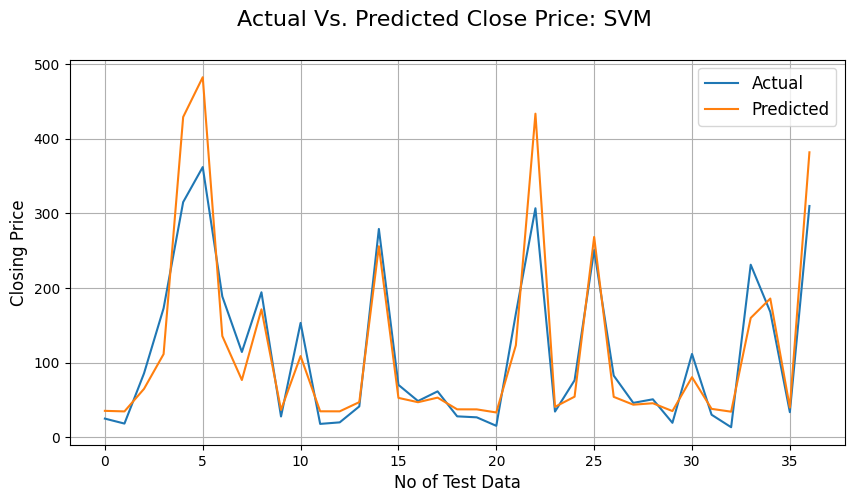

In [85]:
# Actual Price vs. Predicted Price for SVM
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_svm_pred))
plt.suptitle('Actual Vs. Predicted Close Price: SVM', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


I considered the R2 score as an evaluation metric for a positive business impact because it quantifies the model's ability to explain and predict variations in the data, helping ensure effective decision-making and performance assessment.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


I chose the K-Nearest Neighbors (KNN) model as the final prediction model because it achieved the highest R-squared (R2) score accuracy of 99%. KNN excelled in capturing intricate patterns and relationships in the data, resulting in superior predictive performance compared to other models.

In [86]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2


    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)

  return df

In [87]:
model = [lr, ls, rg, elastic,knn_regressor,svm_regressor]

In [88]:
# now pass through function
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(x_train, x_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
5,Lasso,0.0399,0.1998,0.1729,0.1056,0.7921
4,ElasticNet,0.0312,0.1767,0.1473,0.0912,0.8375
3,SVR,0.0267,0.1634,0.1382,0.0864,0.8610
1,LinearRegression,0.0238,0.1544,0.1321,0.0796,0.8758
2,Ridge,0.0239,0.1544,0.1322,0.0796,0.8758
0,KNeighborsRegressor,0.0027,0.0515,0.0373,0.0216,0.9862


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 I utilized the K-Nearest Neighbors (KNN) model for my Yes Bank stock closing price prediction project. KNN leverages the similarity of historical stock data points to make predictions. Regarding feature importance, KNN doesn't offer direct feature importance scores. Instead, I employed feature scaling and selection techniques, as well as visualizations like partial dependency plots, to gain insights into which features significantly influence the predictions.






# **Conclusion**

* In EDA part we observed that
1. There is increase in trend of Yes Bank's stock's Close,Open,High,Low price till 2018 an then sudden decrease.
2. We observed that open vs close price graph concluded that after 2018 yes bank's stock hitted drastically.
3. We saw Linear relation between the dependent and independent values.
4. There was alot of multicollinearity present in data.
5. Target variable(dependent variable) strongly dependent on independent variables
6. We get maximum accuracy of 99%
7. Linear regression and Ridge regression get almost same R squared value
8. Whereas Lasso model shows lowest R squared value and high MSE,RMSE,MAE,MAPE
9. Ridge regression shrunk the parameters to reduce complexity and multicollinearity but ended up affecting the evaluation metrics.
10. Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).
11. KNeighborsRegressor end up giving the highest R squared value. The predicted values are nearly equal to the actual values. We got 99% accuracy.
12. SVM and Elastic Net showed nearly equal accuracy.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***